In [1]:
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path
# from train_generator import batch_iterator, random_rotate, random_image_shift
# from utils.util import train_progressbar, slack_message
from config import TRAIN_FILE, TEST_FILE
import os
import random

In [25]:
def parse_tfrecord(record):

    keys_to_features = {
        'height': tf.FixedLenFeature((), tf.int64),
        'width': tf.FixedLenFeature((), tf.int64),
        'image/raw': tf.FixedLenFeature((), tf.string),
        'label': tf.FixedLenFeature((), tf.string),
    }

    features = tf.parse_single_example(record, features=keys_to_features)
    height = tf.cast(features['height'], tf.int64)
    width = tf.cast(features['width'], tf.int64)
    image = tf.cast(features['image/raw'], tf.string)
    label = tf.cast(features['label'], tf.string)

    image = tf.decode_raw(image, tf.float64)
    image = tf.reshape(image, shape=[height, width, -1])
    
    label = tf.decode_raw(label, tf.int32)
    label = tf.reshape(label, shape=[10,])

    return image, label

In [64]:
rand_num = tf.placeholder('float32', name='rand_num')

In [4]:
# ? tf.contrib.image.rotate

In [5]:
# from tensorflow.python.ops import random_ops
# def random_rotate(image,label):
#     rotate_angle = random.choice(range(0,180,10))
#     print(random_ops.random_uniform([], 0, 1.0, seed=42))
#     image = tf.contrib.image.rotate(image,
#                             rotate_angle,
#                             interpolation='NEAREST')
#     image = rotate(image ,rotate_angle ,reshape=False ,mode='reflect')
#     return image, label

In [91]:
print(random_ops.random_uniform([], 0, 1.0, seed=42))

Tensor("random_uniform:0", shape=(), dtype=float32)


In [128]:
def random_rotate(image):
    rotate_angle = tf.random.uniform([],0,100)
    image = tf.contrib.image.rotate(image,
                            rotate_angle,
                            interpolation='NEAREST')
#     image = rotate(image ,rotate_angle ,reshape=False ,mode='reflect')
    return image

In [129]:
def random_image_shift(image):
    tx = tf.random.shuffle([-1,0,1])
    ty = tf.random.shuffle([-1,0,1])
    transforms = [1, 0, tx[0], 0, 1, ty[0], 0, 0]
    image = tf.contrib.image.transform(image, transforms, interpolation='NEAREST')
#     image = shift(image,shift =[tx,ty,0])
    return image

In [130]:
def preprocess_image(image,label):
    image = random_rotate(image)
    image = random_image_shift(image)
    return image,label

In [131]:
rand_num = trotate_angle = tf.math.multiply(tf.math.round(tf.random.uniform([],0,18)),10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num = sess.run(choice)
    print(num[0])

1


In [132]:
def batch_iterator(infile , batch_size, training, shuffle):
    if os.path.isfile(infile) is False:
        raise FileNotFoundError(infile, 'not exist')
    
    dataset = tf.data.TFRecordDataset(infile)
    dataset = dataset.map(parse_tfrecord)        
    if training:
#         for aug_func in augmentation:
        dataset = dataset.map(preprocess_image, num_parallel_calls = -1) #tf.data.experimental.AUTOTUNE
        dataset = dataset.repeat()
        if shuffle:
            dataset = dataset.shuffle(100000)
    dataset = dataset.batch(batch_size, drop_remainder=False)
    iterator = dataset.make_initializable_iterator()
    return iterator

In [133]:

train_iterator = batch_iterator(TRAIN_FILE 
                                , batch_size=5
                                , training=True, shuffle=False
                                )

test_iterator = batch_iterator(TEST_FILE 
                              , batch_size=5
                              , training=False, shuffle=False
                              )


In [85]:
random.random()

0.7117304880715253

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


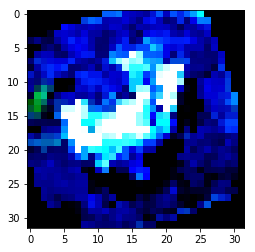

(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


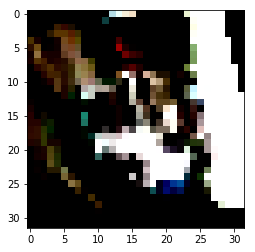

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


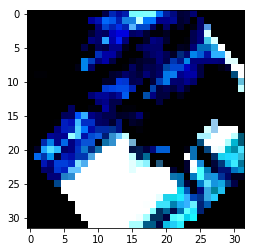

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


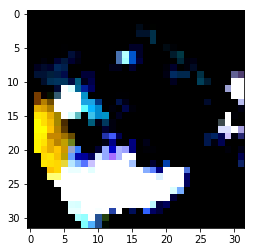

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


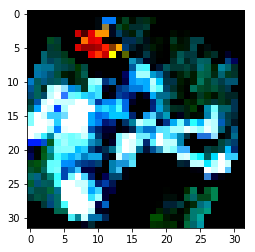

In [134]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(train_iterator.initializer)
    sess.run(test_iterator.initializer)
    train_images_batch, train_labels_batch = train_iterator.get_next()
#     train_images_batch = random_rotate(train_images_batch)
    image , label = sess.run(
                        [train_images_batch, train_labels_batch],
                        feed_dict={rand_num: random.random()})
#     image = random_image_shift(image)
#     for i,img in enumerate(image):
#         image[i] = random_image_shift(img)
#         image[i] = random_rotate(img)
    
    for img in image:
#         print(label[1])
        print(img.shape)
        plt.imshow(img)
        plt.show()

In [40]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

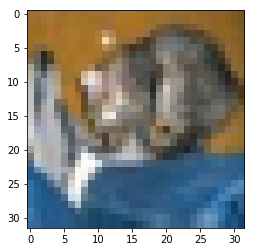

In [72]:
# img = x_test[0]
img = x_test[0].astype('float32') / 255
# print(img)
plt.imshow(img)